In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import norm
%matplotlib inline

mnist = "./mnist_784.csv"
Names_files = "./Names/*"
PatientData = "./PatientData.csv"

In [2]:
#exercise 1
mean = [-5, 5]
cov = [[20, .8], [.8, 30]]
x,y = np.random.multivariate_normal(mean, cov, 10000).T

(10000,) , (10000,)


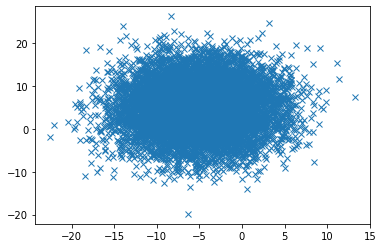

In [3]:
print(str(x.shape) + " , " + str(y.shape))
plt.plot(x, y, 'x') # nice it looks like the multivariate distribution seen in DSP

In [4]:
mean_x = np.sum(x)/len(x)
mean_y = np.sum(y)/len(y)
mean_vector = [mean_x, mean_y]
mean_vector # sweet that's basically what we want [-5, 5]

[-5.039073740628995, 4.972532575433096]

In [5]:
var_x = x - mean_x
var_y = y - mean_y
var_matrix = np.array([var_x, var_y])
cov_matrix = np.dot(var_matrix, var_matrix.T.conj())/(len(x)-1)
cov_matrix

array([[20.11548803,  0.67155382],
       [ 0.67155382, 30.87734551]])

In [6]:
np.cov(np.array([x,y])) # great this looks like the last thing

array([[20.11548803,  0.67155382],
       [ 0.67155382, 30.87734551]])

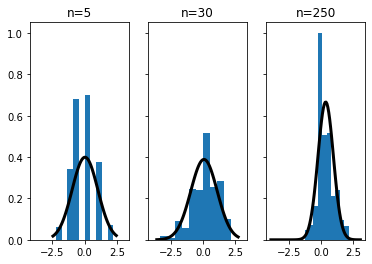

In [7]:
#exercise 2
small_n = 5
medium_n = 30
big_n = 250
sample_size = 1000

# generate random bernoulli with 50% probability [-1,1]
#####
X_i = bernoulli.rvs(0.5, size=sample_size)
X_i = np.where(X_i==0, -1, X_i) 
#####

Zn_small = [np.sum(X_i[i:(i+small_n)%sample_size])/np.sqrt(small_n) for i in range(sample_size)] # get samples Zn
Zn_medium = [np.sum(X_i[i:(i+medium_n)%sample_size])/np.sqrt(medium_n) for i in range(sample_size)] # get samples Zn
Zn_big = [np.sum(X_i[i:(i+big_n)%sample_size])/np.sqrt(big_n) for i in range(sample_size)] # get samples Zn

fig, ax = plt.subplots(1,3, sharex=True, sharey=True)




# plot the density histogram of Zn w/ 5 samples
count_small, bins_small, y = ax[0].hist(Zn_small, density=True)
ax[0].set_title("n=5")
# plot normal curve
#######
mu, std = norm.fit(Zn_small)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0].plot(x, p, 'k', linewidth=3)
######

# plot the density histogram of Zn w/ 30 samples
count_medium, bins_medium, y = ax[1].hist(Zn_medium, density=True)
ax[1].set_title("n=30")
# plot normal curve
######
mu, std = norm.fit(Zn_medium)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1].plot(x, p, 'k', linewidth=3)
######

count_big, bins_big, y = ax[2].hist(Zn_big, density=True)
ax[2].set_title("n=250")
# plot the density histogram of Zn w/ 250 samples
######
mu, std = norm.fit(Zn_big)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[2].plot(x, p, 'k', linewidth=3)
######


In [8]:
#exercise 3
patients = pd.read_csv(PatientData)
print(patients.shape) 
#(451,280) -> 451 patients & 280 features

first_features = patients.iloc[:, 0:4] 
display(first_features)
# breakdown:
# first column is index (provided by pandas)
# second column should be something important, could be age but the "13" in row 4 is looking suspicious
# third column is a discrete value, could be gender, seeing/not-seeing, hearing/not-hearing, etc.. can't be sure without feature analysis
# fourth column looks too be height in centimeters.. no major outliers from the summary
# fifth column seems to be weight? Again, the "51" in row 4 looks suspicious,
# but if you compare row 4 to row 449, a 13 year old "boy" could compare to the weight/height of a 32 y.o. woman

(451, 280)


,75,0,190,80
0,56,1,165,64
1,54,0,172,95
2,55,0,175,94
3,75,0,190,80
4,13,0,169,51
...,...,...,...,...
446,53,1,160,70
447,37,0,190,85
448,36,0,166,68
449,32,1,155,55


In [9]:
display(first_features.iloc[4, :])
display(first_features.iloc[449, :])

75      13
0        0
190    169
80      51
Name: 4, dtype: int64

75      32
0        1
190    155
80      55
Name: 449, dtype: int64

In [10]:
# Are there missing values?
print(np.nan in patients) # False, so they aren't stored as NaNs
print('x' in patients) # False, not x's
display(patients.iloc[:,:15]) # there is a column of '?'
print('?' in patients) # True - assuming these are the missing values
patients.replace('?', np.nan, inplace=True)
patients = patients.astype(float)
patients.fillna(patients.mean(), inplace=True) 
display(patients.iloc[:,:15])

False
False


,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
0,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
1,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
2,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
3,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?
4,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63
447,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73
448,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84
449,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80


True


,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,-17.0,31.0,-13.592105,53.000000
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,70.0,66.0,23.000000,75.000000
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,-5.0,20.0,-13.592105,71.000000
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,61.0,3.0,-13.592105,74.488889
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,66.0,52.0,88.0,-13.592105,84.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,4.0,40.0,-27.0,-13.592105,63.000000
447,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,66.0,52.0,79.0,-13.592105,73.000000
448,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,-19.0,-61.0,-70.0,84.000000,84.000000
449,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,29.0,-22.0,43.0,103.000000,80.000000


,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
75,1.000000,-0.055041,-0.112350,0.380295,-0.004568,0.038057,0.195911,0.025302,0.095607,-0.262884,...,0.163452,-0.158486,0.081584,0.091024,NaN,-0.042343,-0.277385,0.016968,-0.204824,-0.096395
0,-0.055041,1.000000,-0.123334,-0.246827,-0.337234,-0.044792,0.072431,-0.184710,-0.078332,0.066926,...,0.232570,-0.042730,0.093699,0.027243,NaN,0.016981,0.068776,0.032459,0.049385,-0.176193
190,-0.112350,-0.123334,1.000000,-0.076050,-0.006525,0.012415,-0.237587,-0.038591,0.027373,0.063209,...,-0.019615,-0.073452,-0.091807,-0.002433,NaN,0.066213,-0.010166,-0.090840,-0.093933,0.005325
80,0.380295,-0.246827,-0.076050,1.000000,0.099938,0.118650,0.118545,0.149894,0.119024,-0.171948,...,0.049708,-0.026920,0.051539,0.047601,NaN,-0.048127,-0.146893,0.061859,-0.052486,-0.091773
91,-0.004568,-0.337234,-0.006525,0.099938,1.000000,0.021595,0.218655,0.397415,0.049401,-0.145911,...,-0.199156,0.091390,-0.228796,-0.013673,NaN,-0.066021,-0.222871,0.129723,-0.083224,0.323919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9.3,-0.042343,0.016981,0.066213,-0.048127,-0.066021,0.141499,-0.035300,0.048962,0.245865,0.084931,...,-0.086841,-0.007990,-0.092889,-0.019777,NaN,1.000000,-0.046339,-0.070680,-0.067003,-0.088937
2.9.1,-0.277385,0.068776,-0.010166,-0.146893,-0.222871,0.059091,-0.039241,-0.185431,0.012957,0.066348,...,0.115842,0.093930,-0.073254,-0.017510,NaN,-0.046339,1.000000,-0.124978,0.687003,-0.033325
23.3,0.016968,0.032459,-0.090840,0.061859,0.129723,-0.028268,0.256154,0.130142,-0.017179,0.298921,...,0.002299,0.671457,0.562745,-0.051085,NaN,-0.070680,-0.124978,1.000000,0.611363,0.002868
49.4,-0.204824,0.049385,-0.093933,-0.052486,-0.083224,0.019067,0.150904,-0.014721,0.001413,0.258498,...,0.081450,0.561131,0.341288,-0.049541,NaN,-0.067003,0.687003,0.611363,1.000000,-0.011539


75      -0.022651
0       -0.018982
190      0.017586
80       0.002338
91       0.055933
           ...   
0.9.3    0.008868
2.9.1    0.023051
23.3     0.047668
49.4     0.051764
8        0.023707
Length: 280, dtype: float64

Max average correlation for column (features) in patients data: 0.058421017315845425
Min average correlation for column (features) in patients data: -0.04645664113582557


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


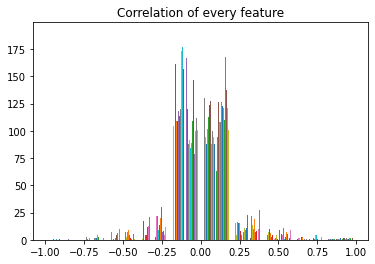

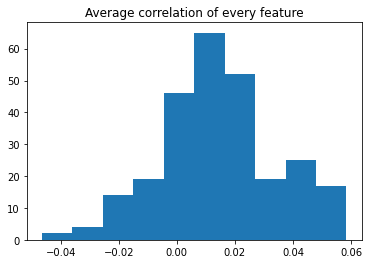

In [11]:
# find the features highly related to patient's condition
# first get the correlation matrix
patients_correlation_matrix = patients.corr()
display(patients_correlation_matrix) # don't like how this is coming out
mean_patients_correlation_matrix = patients_correlation_matrix.mean()
display(mean_patients_correlation_matrix) 
print("Max average correlation for column (features) in patients data: " + str(mean_patients_correlation_matrix.max()))
print("Min average correlation for column (features) in patients data: " + str(mean_patients_correlation_matrix.min()))

_ = plt.hist(patients_correlation_matrix)
plt.title("Correlation of every feature")
plt.show()

_ = plt.hist(mean_patients_correlation_matrix) # no column averages higher than 0.06 correlation
plt.title("Average correlation of every feature")
plt.show()

# so it seems the relationship between condition and patient features is not completely standard between patients
# that's expected but it's good to see

In [ ]:
# define strong featurees to be those over 0.75 or less than -0.75 => looks to be at edges of (normal) curve
strong_features = [i for i, corr in enumerate(patients_correlation_matrix.iloc[len(patients_correlation_matrix)-1]) if corr >= 0.75 or corr <= -0.75]
print(strong_features)

[279]


In [15]:
# Example 5: MNIST
import numpy as np
import pandas as pd
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
mnist = ds.fetch_openml('mnist_784')

In [17]:
# There are 70000 different digits and 784 features for each.
# These features all correspond to an individual pixel in the image
mnist.data.shape

(70000, 784)

In [18]:
data = pd.DataFrame(data= np.c_[mnist['data'], mnist['target']],
                     columns= mnist['feature_names'] + ['target'])

In [19]:
# The dataset has all the values from 0 to 9 and they all occur at relatively similar frequencies
data['target'].value_counts(sort=True)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64

In [20]:
labels = mnist.target.tolist()

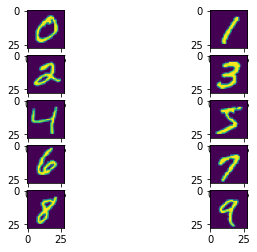

In [21]:
f, ax = plt.subplots(5,2)

for i in range(10):
  img = np.reshape(mnist.data[labels.index(str(i))], (28,28))
  ax[i//2,i%2].imshow(img)

The train test split function in sklearn takes our dataset and splits it into two. The test and training sets. This allows our model to predict a model on our testing set and then tes this model on a set of data that is seperate from its testers.

The score in the DecisionTreeClassifier gives an average value to the accuracy of our predicitons.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, train_size = 500, test_size = 2000)

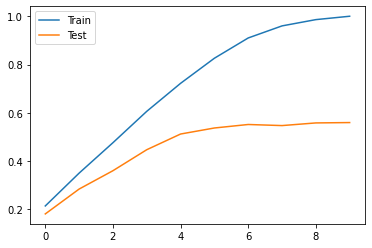

In [23]:
# We see that as our decision tree gets deeper and deeper, the training score goes up
# However, there are diminishing returns on the testing set as the model starts to overfit
x = np.linspace(0,9,10)
train_score = list()
test_score = list()

for i in range(1,11):
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train, Y_train)
  train_score.append(tree.score(X_train, Y_train))
  test_score.append(tree.score(X_test, Y_test))

plt.plot(x, train_score, label="Train")
plt.plot(x, test_score, label="Test")
plt.legend()

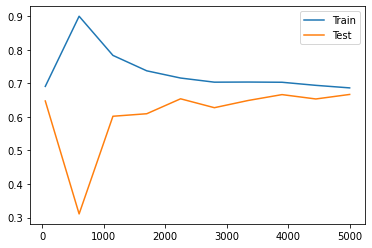

In [24]:
# By changing the split, instead we see a score that starts to merge.
# This is due to the larger set of training data being less likely to overfit
x = np.linspace(50,5000,10)
train_score = list()
test_score = list()

tree = DecisionTreeClassifier(max_depth=5)

for i in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, train_size = int(x[i-1]), test_size = 2000)
  tree.fit(X_train, Y_train)
  train_score.append(tree.score(X_train, Y_train))
  test_score.append(tree.score(X_test, Y_test))

plt.plot(x, train_score, label="Train")
plt.plot(x, test_score, label="Test")
plt.legend()

In [61]:
# Exercise 4
import pandas as pd
import glob
import os
import sys

In [62]:
# Load data - takes a while to run
path = os.getcwd()
all_files = glob.glob(path + '/Names/*.txt')

li = []

for filename in all_files:
    df = pd.read_csv(filename, header=None)
    df.columns = ['Name','Gender','Frequency']
    df['Year'] = os.path.basename(filename)[3:7]
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

,Name,Gender,Frequency,Year
0,Emily,F,25953,2000
1,Hannah,F,23075,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17689,2000
...,...,...,...,...
1858684,Winfrey,M,5,1935
1858685,Yancy,M,5,1935
1858686,Yazzie,M,5,1935
1858687,Zaragoza,M,5,1935


In [63]:
# Exercise 4.1 Write a program that on input k and XXXX, returns the top k names from year XXXX

k = 6
year = 1883

df_result = df.loc[df['Year'] == str(year)]
df_result.sort_values(by=['Frequency'], ascending=[False]).head(k)

,Name,Gender,Frequency,Year
1825295,John,M,8894,1883
1825296,William,M,8387,1883
1824241,Mary,F,8012,1883
1825297,James,M,5223,1883
1825298,Charles,M,4826,1883
1825299,George,M,4736,1883


In [64]:
# Exercise 4.2 Write a program that on input Name returns the frequency for men and women of the name Name.
name = 'Mary'

print('People with the name {}:'.format(name))
print('Male: '+ str(df[(df['Name'] == name) & (df['Gender'] == 'M')].Frequency.sum()))
print('Female: '+ str(df[(df['Name'] == name) & (df['Gender'] == 'F')].Frequency.sum()))

People with the name Mary:
Male: 15158
Female: 4118058


In [65]:
# Exercise 4.3 It could be that names are more diverse now than they were in 1880, so that a name may be relatively 
# the most popular for that year, though its frequency that year may have been decreasing over the years. 
# Modify the above to return the relative frequency.

name = 'Mary'

print('People with the name {}:'.format(name))

male_frequency = df[(df['Name'] == name) & (df['Gender'] == 'M')].Frequency.sum()
male_relative_frequency = male_frequency / df[df['Gender'] == 'M'].Frequency.sum()
female_frequency = df[(df['Name'] == name) & (df['Gender'] == 'F')].Frequency.sum()
female_relative_frequency = female_frequency / df[df['Gender'] == 'F'].Frequency.sum()

print("Male: {}\t Relative Frequency: {}".format(male_frequency, male_relative_frequency))
print("Female: {}\t Relative Frequency: {}".format(female_frequency, female_relative_frequency))

People with the name Mary:
Male: 15158	 Relative Frequency: 8.813286137579444e-05
Female: 4118058	 Relative Frequency: 0.024387181356545513


In [135]:
# Exercise 4.4 Find all the names that used to be more popular for one gender, but then became more popular for another gender.
pd.options.mode.chained_assignment = None  # default='warn'

starting_year = 1880
ending_year = 2015

starting_m_df = df[(df['Year'] == str(starting_year)) & (df["Gender"] == "M")]
starting_m_df["RelativeFrequency"] = starting_m_df['Frequency']/starting_m_df.Frequency.sum()

starting_f_df = df[(df['Year'] == str(starting_year)) & (df["Gender"] == "F")]
starting_f_df["RelativeFrequency"] = starting_f_df['Frequency']/starting_f_df.Frequency.sum()

ending_m_df = df[(df['Year'] == str(ending_year)) & (df["Gender"] == "M")]
ending_m_df["RelativeFrequency"] = ending_m_df['Frequency']/ending_m_df.Frequency.sum()

ending_f_df = df[(df['Year'] == str(ending_year)) & (df["Gender"] == "F")]
ending_f_df["RelativeFrequency"] = ending_f_df['Frequency']/ending_f_df.Frequency.sum()

li_f = []
li_m = []

m_name_list = ending_m_df.Name.tolist()
f_name_list = ending_f_df.Name.tolist()

# print(ending_f_df[ending_f_df["Name"] == "Emma"].RelativeFrequency.values[0])

for row in starting_m_df.itertuples():
    if row.Name in f_name_list:
        if row.RelativeFrequency < (ending_f_df[ending_f_df["Name"] == row.Name].RelativeFrequency.values[0]):
            li_m.append(row.Name)
        
for row in starting_f_df.itertuples():
    if row.Name in m_name_list:
        if row.RelativeFrequency < (ending_m_df[ending_m_df["Name"] == row.Name].RelativeFrequency.values[0]):
            li_f.append(row.Name)

print("The names that are used to be more popular on male:")
print(li_m)
print()
print("The names that are used to be more popular on female:")
print(li_f)




The names that are used to be more popular on male:
['Harley', 'Emery', 'Riley', 'Taylor', 'Morgan', 'Allie', 'Mary', 'Emerson', 'Jordan', 'Madison', 'Aubrey', 'Elliott', 'Dallas', 'Addison', 'Frances', 'Alma', 'Parker', 'Logan', 'Anna', 'Bailey', 'Dana', 'Hunter', 'Sydney', 'Finley', 'Lindsey', 'Emma', 'Noel', 'Palmer', 'Shirley', 'Avery', 'Carson', 'Elizabeth', 'June', 'Lacy', 'Addie', 'Ashley', 'Clara', 'Clare', 'Florence', 'Ida', 'Ivory', 'Quincy', 'Shelby', 'Elliot', 'Ivey', 'Lindsay', 'Rose', 'Tyler', 'Vivian', 'Allison', 'Annie', 'Cora', 'Dora', 'Drew', 'Eliza', 'Elsie', 'Grace', 'Hallie', 'Hattie', 'Hope', 'Nellie', 'Reese', 'Ruby', 'Stacy', 'Cleo', 'Daisy', 'Denver', 'Edie', 'Edith', 'Flora', 'Hayden', 'Holly', 'Hudson', 'Ivy', 'Jewel', 'Justice', 'Katherine', 'Kelly', 'Lillie', 'Mattie', 'Merida', 'Nora', 'Nova', 'Payton', 'Presley', 'Reece']

The names that are used to be more popular on female:
['John', 'William', 'George', 'James', 'Clyde', 'Frank', 'Eddie', 'Charles', 'He

In [6]:
# Written Problem 2
V = np.array([[0,1],[1,0],[1,0]]) # matrix of basis vectors by column
P1 = [3, 1, 0]
P2 = [3, 2, 0]
P3 = [3, 3, 1]
point_mat = np.array([P1, P2, P3])
projection = np.matmul(np.matmul(np.matmul(V, np.linalg.inv(np.matmul(V.T, V))), V.T), point_mat)
projection

array([[3. , 1. , 0. ],
       [3. , 2.5, 0.5],
       [3. , 2.5, 0.5]])